# <div align="center"> SPECIAL TOPICS III </div>
## <div align="center"> Data Science for Social Scientists  </div>
### <div align="center"> ECO 4199 </div>
#### <div align="center">Class 8 - Tree-based methods</div>
<div align="center"> Fabien Forge, (he/him)</div>

In [1]:
!pip install graphviz

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Road Map
$$y=f(X) + \varepsilon$$
- Today we will see a truly different function that relates X and y


# Decision Tree

## Motivating example: Baseball
- Say that you want to predict a baseball player's salary
- You are given three pieces of information:
    - Salary in thousands of dollars (target)
    - Number of years of experience in the major leagues and Hits (number of hits made in the previous year)
- You start with some data cleaning:
    - Drop when you don't observe salary
    - Take the __log-transform__ of salary so it's distribution looks more like a bell-shape

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
folder="/content/drive/MyDrive/ECO4199 - University of Ottawa/Class 8/"


In [4]:
df=pd.read_csv(folder+"Hitters.csv")
df.pop(df.columns[0])
print("Before Data Cleaning")
display(df.head())
df=df.loc[:,['Salary','Years','Hits']] # keep only the variables needed
df=df.loc[~df['Salary'].isna()] # keep only if observations have information on salary (i.e. if Salary is not (~) missing)
df['salary']=np.log(df['Salary']) # create log of Salary and assign to salary (small cap)
display(df.describe().T)
print("After Data Cleaning")
df.head()

Before Data Cleaning


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


,count,mean,std,min,25%,50%,75%,max
Salary,263.0,535.925882,451.118681,67.500000,190.000000,425.000000,750.000000,2460.000000
Years,263.0,7.311787,4.793616,1.000000,4.000000,6.000000,10.000000,24.000000
Hits,263.0,107.828897,45.125326,1.000000,71.500000,103.000000,141.500000,238.000000
salary,263.0,5.927222,0.889192,4.212128,5.247024,6.052089,6.620073,7.807917


After Data Cleaning


,Salary,Years,Hits,salary
1,475.0,14,81,6.163315
2,480.0,3,130,6.173786
3,500.0,11,141,6.214608
4,91.5,2,87,4.516339
5,750.0,11,169,6.620073


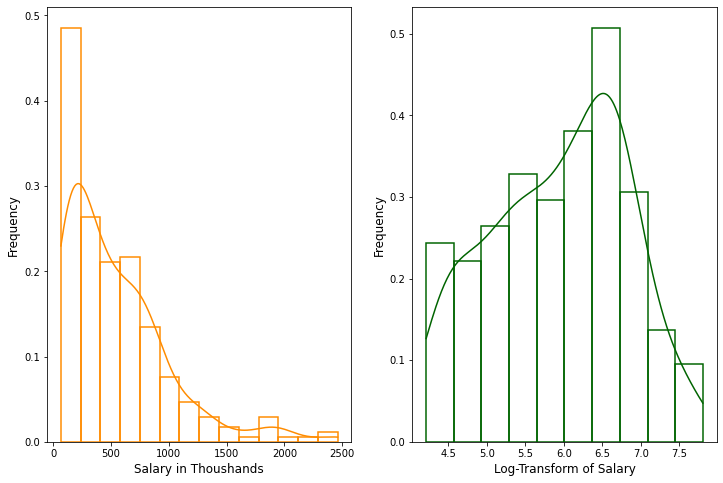

In [5]:
fig, axes =plt.subplots(1,2, figsize=(12,8))

sns.histplot(x=df['Salary'], stat='frequency', kde=True,color='darkorange', fill=False,line_kws={'color':'k'}, ax=axes[0])
sns.histplot(x=df['salary'], stat='density', kde=True,color='darkgreen', fill=False, ax=axes[1])

axes[0].set_xlabel("Salary in Thoushands",fontsize=12)
axes[1].set_xlabel("Log-Transform of Salary",fontsize=12)
axes[0].set_ylabel("Frequency",fontsize=12)
axes[1].set_ylabel("Frequency",fontsize=12)

plt.show()

In-sample MSE: 0.31175425680167934


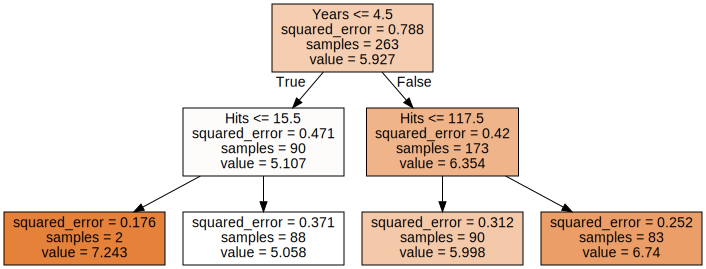

In [6]:
# Import DecisionTreeClassifier
from sklearn.tree  import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection  import train_test_split
# Import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Split dataset into 80% train, 20% test
#X_train, X_test, y_train, y_test= train_test_split(df[['Hits','Years']], df['salary'],test_size=0.2,random_state=1706)
X_train=df.loc[:,['Hits','Years']]
y_train=df.loc[:,'salary']
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=2, random_state=1706)
dt.fit(X_train,y_train)

# Predict test set labels
y_pred = dt.predict(X_train)
# Evaluate test-set accuracy
print(f"In-sample MSE: {mean_squared_error(df['salary'], y_pred)}")

#store label name
labels = X_train.columns.tolist()

# print decision tree
graph = Source(tree.export_graphviz(dt, out_file=None, feature_names=labels , filled = True))
display(SVG(graph.pipe(format='svg')))

In [7]:
df['Salary_Predicted']=y_pred
# Split on Years
df.loc[df.Years<=4.5,'Year_Split']='Years $\leq$ 4.5'
df.loc[df.Years>4.5,'Year_Split']='Years $>$ 4.5'
# If Split on Years is True
df.loc[((df.Years<=4.5) & (df.Hits<=15.5)),'Hits_Split']=r"Hits $\leq$ 15.5"
df.loc[((df.Years<=4.5)& (df.Hits>15.5)),'Hits_Split']=r'Hits $>$ 15.5'
# If Split on Years is False
df.loc[((df.Years>4.5) & (df.Hits<=117.5)),'Hits_Split']=r"Hits $\leq$ 117.5"
df.loc[((df.Years>4.5)& (df.Hits>117.5)),'Hits_Split']='Hits $>$ 117.5'
df['Path']= df['Year_Split'] +' and '+df['Hits_Split']
df.head()

,Salary,Years,Hits,salary,Salary_Predicted,Year_Split,Hits_Split,Path
1,475.0,14,81,6.163315,5.998380,Years $>$ 4.5,Hits $\leq$ 117.5,Years $>$ 4.5 and Hits $\leq$ 117.5
2,480.0,3,130,6.173786,5.058228,Years $\leq$ 4.5,Hits $>$ 15.5,Years $\leq$ 4.5 and Hits $>$ 15.5
3,500.0,11,141,6.214608,6.739687,Years $>$ 4.5,Hits $>$ 117.5,Years $>$ 4.5 and Hits $>$ 117.5
4,91.5,2,87,4.516339,5.058228,Years $\leq$ 4.5,Hits $>$ 15.5,Years $\leq$ 4.5 and Hits $>$ 15.5
5,750.0,11,169,6.620073,6.739687,Years $>$ 4.5,Hits $>$ 117.5,Years $>$ 4.5 and Hits $>$ 117.5


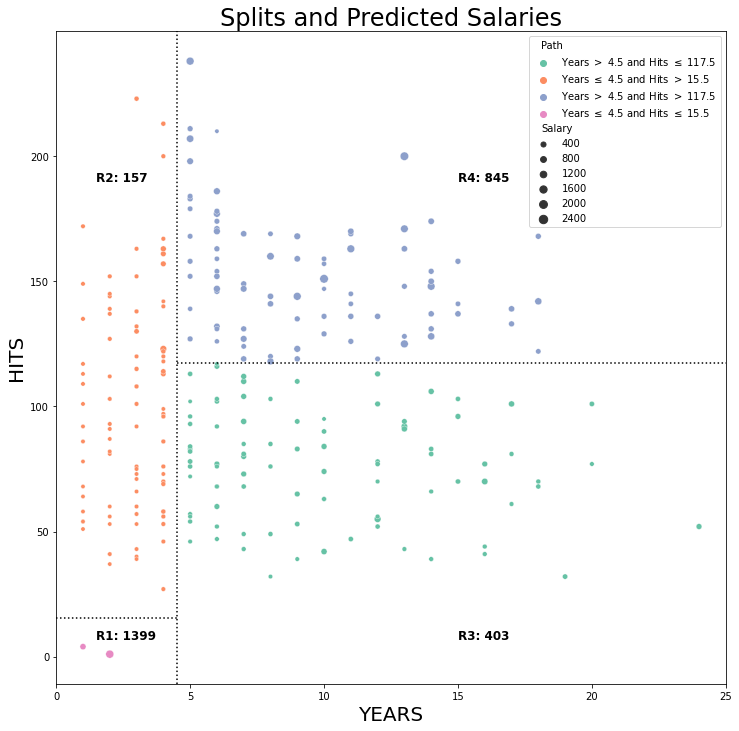

In [8]:
sns.set_palette("Set2")
fig, ax=plt.subplots(1,1, figsize=(12,12))

sns.scatterplot(data=df, x='Years', y='Hits',hue='Path', size='Salary')

# single split on year at 4.5
ax.axvline(x=4.5, color='k', linestyle=':')

# Years <4.5 and Hits <=15.5
ax.plot((0, 4.5), (15.5, 15.5), 'k:')
# Years >4.5 and Hits <=117.5
ax.plot((4.5, 25), (117.5, 117.5), 'k:')

ax.set_xlabel("YEARS", fontsize=20)
ax.set_ylabel("HITS", fontsize=20)

ax.set_xlim(xmin=0,xmax=25)
plt.text(1.5, 7, f"R1: {str(round(np.exp(7.243499)))}", horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1.5, 190, f"R2: {str(round(np.exp(5.058228)))}", horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(15, 7, f"R3: {str(round(np.exp(5.998380)))}", horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(15, 190, f"R4: {str(round(np.exp(6.739687)))}", horizontalalignment='left', size='large', color='black', weight='semibold')

plt.title("Splits and Predicted Salaries",fontsize=24)
plt.show()

## Regression tree fit to the data
- The 2 figures in the previous slides shows how data is fit to the data depending on __splitting rules__
- It consists of a series of splitting rules, __starting at the top of the tree__. 
- The top split assigns observations having Years<4.5 to the left __branch__.
    - The data is then further divided depending on the number of hits:
        - For Hits <=15.5 (Region 1): Predicted Salary is $e^{7.243}$ = 1,399 thousands dollars
        - For Hits > 15.5 (Region 2): Predicted Salary is \$157,000
- Similar reasoning leads to regions 3 and 4
- Note that these predicted wages correspond to the mean of each group!

In [9]:
df.groupby('Path').agg({'salary':np.mean,'Salary_Predicted':np.mean})

,salary,Salary_Predicted
Path,,
Years $>$ 4.5 and Hits $>$ 117.5,6.739687,6.739687
Years $>$ 4.5 and Hits $\leq$ 117.5,5.998380,5.998380
Years $\leq$ 4.5 and Hits $>$ 15.5,5.058228,5.058228
Years $\leq$ 4.5 and Hits $\leq$ 15.5,7.243499,7.243499


## Terminology
- R1, R2, R3 and R4 are known as __terminal nodes__ or __leaves__
    - Trees are typically drawn upside down, in the sense that the leaves are at the bottom of the tree. 
- The points along the tree where the predictor space is split are referred to as __internal nodes__. 
    - This is where the splits occur
- We refer to the segments of the trees that connect the nodes as __branches__.

## Interprating the results
You should interpret the results this way:
- Years is the most important factor in determining Salary and players with less experience earn lower salaries than more experienced players. 
- Given that a player is less experienced, the number of hits that he made in the previous year seems to play little role in his salary. 
    - For a couple of players it's even a plus (outliers?)
- But among players who have been in the major leagues for five or more years, the number of hits made in the previous year does affect salary, and players who made more hits last year tend to have higher salaries.
- Note that we could probably predict Salary using an OLS regression but this representation is very easy to interpret

# Decision trees: under the hood
- What we did here is predict salary using __stratification of the feature space__ which we did in 2 steps:
    1. We divide the predictor space—that is, the set of possible values for $X_1,X_2, . . .,X_p$—into J distinct and non-overlapping regions, $R_1,R_2, \dots , R_J$
        - In our example, J=4
    2. For every observation that falls into the region $R_j$, we make the same prediction, which is simply the mean of the response values for the training observations in $R_j$

## Dividing the predictor space
How do we construct the regions $R_1, \dots,R_J$? 
- We divide the predictor space into high-dimensional rectangles, or __boxes__
- The goal is to find boxes R1, . . . , RJ that minimize the RSS!
    $$\Large \sum_{j=1}^J \sum_{i \in R_J} (y_i - \hat{y}_{R_j})^2$$
- Where $\hat{y}_{R_j}$ is __the average__ of the $j_{th}$ box
For J=2:
$$  \sum_{i \in R_1} (y_i - \hat{y}_{R_1})^2 +\sum_{i \in R_2} (y_i - \hat{y}_{R_2})^2 $$
 

## Dividing the predictor space continued
- Note that we are no longer trying to fit data using parameters ($\beta$) 
- Our prediction for y instead relies on simply taking the average of the group j
- This a method known as __nonparametric__ estimation
- As you can imagine, the question is how to best minimize our objective function (RSS)

## Dividing the predictor space, still
- Consider the _Years_ predictor, 4.5 Years is value that minimizes the RSS
- It means we divided the predictor space into two regions $\left\{X|X_j \leq s\right\}$ and $\left\{X|X_j > s\right\}$ such that the cutpoint $s$ leads to the greatest possible reduction in RSS. 
    - The notation means the region of predictor space in which $X_j$ takes on a value less or equal (or greater than s.)

In [10]:
dd=df.copy()
cutpoints=np.linspace(df['Years'].min(),df['Years'].max(),((df['Years'].max()-df['Years'].min())*2)+1)
RSS=[] ; cutoffs=[]
for s in cutpoints:
    # split the data along the cutoff
    dd_inf=dd.loc[df.Years<=s].copy() ; dd_sup=dd.loc[df.Years>s].copy()
    dd_inf['y_hat']=dd_inf['salary'].mean() ; dd_sup['y_hat']=dd_sup['salary'].mean()
    # take the square of the residual of each region
    dd_inf['residual_sq'] = np.square(dd_inf['salary'] - dd_inf['y_hat'] ) 
    dd_sup['residual_sq'] = np.square(dd_sup['salary'] - dd_sup['y_hat'] ) 
    # take the sum of the squared residual
    rss_inf=dd_inf['residual_sq'].sum(); rss_sup=dd_sup['residual_sq'].sum()
    # add the RSS of each region and append in RSS list
    RSS.append(rss_inf+rss_sup)  ; cutoffs.append(s)
    
dd=pd.DataFrame({'RSS':RSS, 'Cutpoint':cutoffs})  
dd.head()

,RSS,Cutpoint
0,180.035910,1.0
1,180.035910,1.5
2,150.869546,2.0
3,150.869546,2.5
4,120.182414,3.0


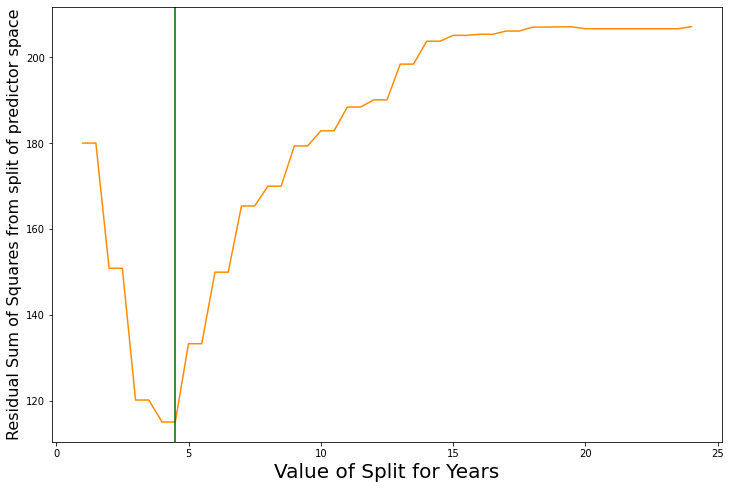

In [11]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.lineplot(x='Cutpoint',y='RSS',color="darkorange",data=dd,ax=ax)
ax.axvline(4.5,color='darkgreen')
ax.set_xlabel("Value of Split for Years", fontsize=20)
ax.set_ylabel("Residual Sum of Squares from split of predictor space", fontsize=16)

plt.show()

## Dividing the predictor space, next

- So we now know that we should split the data along Years=4.5
- Next, we repeat the process, looking for the best predictor and best cutpoint in order to split the data further so as to minimize the RSS within each of the __resulting regions__. 
    - However, this time, instead of splitting the entire predictor space, we split one of the two previously identified regions.
- The process continues until a stopping criterion is reached; 
    - for instance, we may continue until no region contains more than five observations.
- Once the regions $R_1, \dots , R_J$ have been created, we predict the response for a given test observation using the mean of the training observations in the region to which that test observation belongs

# Classification Trees
- What if you want to predict a qualitative variable instead?
- __Classification trees__ are very similar to a regression tree, except that it is classification used to predict a qualitative response rather than a quantitative one. 
- Instead of predicting the average of the region, we will predict that each observation belongs to the most commonly occurring class of training observations in the region to which it belongs

## Error rate
- In the classification setting, RSS cannot be used as a criterion for making the binary splits.
- Instead we can use the __classification error rate__. 
    - the fraction of the training observations in that region that do not belong to the most common class:
$$ \text{Error Rate}= 1 - \max_k(\hat{p}_{mk}) $$
- Here $\hat{p}_{mk}$ represents the proportion of training observations in the $m_{th}$ region that are from the $k^{th}$ class. 
    - However, it turns out that classificationerror is not sufficiently sensitive for tree-growing, and in practice two other measures are preferable.

## Gini Index
$$\text{Gini}=\sum_{k=1}^K \hat{p}_{mk}(1-\hat{p}_{mk})$$
- Gini is a measure of total variance across the K classes. 
    - Gini index takes on a small value if all of the $\hat{p}_{mk}$ are close to zero or one. 
- Gini index is a measure of __node purity__ 
    - a small value indicates that a node contains predominantly observations from a single class.

## Enthropy
$$\text{Enthropy}= - \sum_{k=1}^K \hat{p}_{mk}\log\hat{p}_{mk}$$
- Since $0 \leq \hat{p}_{mk} \leq 1$ , it follows that $0 \leq −\hat{p}_{mk}\log\hat{p}_{mk}$. 
- Entropy will take on a value near zero if the $\hat{p}_{mk}$ are all near zero or near one. 
- Gini or Enthropy are the preferred ways to measure the quality of a particular split

In [12]:
df2=pd.read_csv(folder+'Heart.csv')
df2.pop(df2.columns[0])
display(df2.head())
df2['ChestPain'] = pd.factorize(df2.ChestPain)[0]
df2['Thal'] = pd.factorize(df2.Thal)[0]
df2['AHD']=df2['AHD'].replace({"Yes":1, "No":0})
df2.dropna(inplace=True)
y_train2=df2.pop('AHD') 
X_train2=df2
df2.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1


Classification Tree using Giny

0.7658862876254181

Classification Tree using Giny


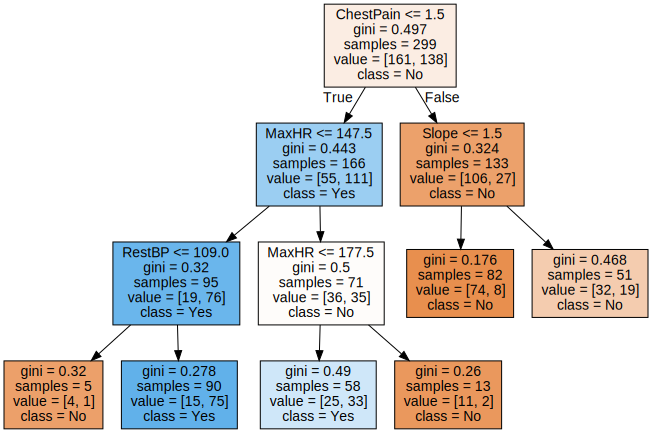

In [13]:
from sklearn.tree  import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3, random_state=1706)
clf.fit(X_train2,y_train2)
display(clf.score(X_train2,y_train2))

#store label name
labels = X_train2.columns.tolist()

# print decision tree
print("Classification Tree using Giny")
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=labels, class_names=['No', 'Yes'] , filled = True))
display(SVG(graph.pipe(format='svg')))

Classification Tree using Enthropy

0.7391304347826086

Classification Tree using Enthropy


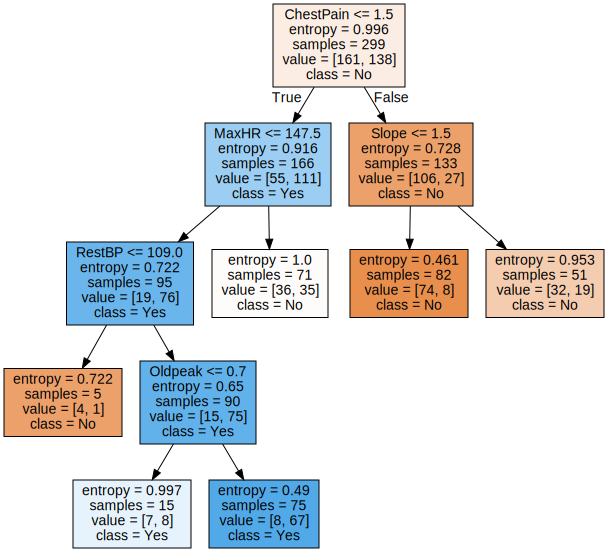

In [14]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3, criterion="entropy", random_state=1706)
clf.fit(X_train2,y_train2)
display(clf.score(X_train2,y_train2))

#store label name
labels = X_train2.columns.tolist()

# print decision tree
print("Classification Tree using Enthropy")
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=labels, class_names=['No', 'Yes'] , filled = True))
display(SVG(graph.pipe(format='svg')))

# Linear model vs Trees
- As you know, the linear regression assumes a model of the form:
$$y= f(x)= \beta_0 + \sum_{j=1}^p \beta_j X_j$$
- Instead, regression trees assume a model of the form:
$$y=f(x)=\sum_{m=1}^M c_m \mathbb{1}_{X\in R_m}$$
- If the relationship is indeed linear then an approach such as linear regression will likely work well, and will outperform a method such as a regression tree that does not exploit this linear structure. 
- If instead there is a highly non-linear and complex relationship between the features and the response, then decision trees may outperform classical approaches.
    - Recall also that interpretability is better for trees

![](figure8_7.png)

## Trees, Pros and Cons

| Pros | Cons |
| --- | --- |
|- Trees are very easy to explain to people including non-expexts | - Trees generally do not have the same level of predictive accuracy as some of the other regression and classification approaches seen in this class |
|- Close to human decision-making (cons?) | - Trees can be very non-robust. In other words, a small change in the data can cause a large change in the final estimated tree|
|- Trees can easily handle qualitative predictors without the need to create dummy variables | |


# Bagging, Random Forests, Boosting

Bagging, random forests, and boosting use trees as building blocks to
construct more powerful prediction models.

## Bagging
- The decision trees discussed so far suffer from high variance.
    - if we split the training data into two parts at random, and fit a decision tree to both halves, the results that we get could be quite different. 
    - In contrast, a procedure with low variance will yield similar results if applied repeatedly to distinct data sets
    - linear regression tends to have low variance, if the ratio of n to p is moderately large.
- __Bootstrap aggregation__, or __bagging__, is a general-purpose procedure for reducing the bagging variance of a statistical learning method

## Bagging, continued

- Given a set of n independent observations $Z_1, \dots , Z_n$, each with variance $\sigma^2$, the variance of the mean $\bar{Z}$ of the observations is given by $\sigma^2/n$. 
    - Averaging a set of observations reduces variance!
    
- A natural way to reduce the variance and hence increase the prediction _accuracy_ of a statistical learning method is to take many training sets from the population, build a separate prediction model using each training set, and average the resulting predictions. 
- In other words, we could calculate $\hat{f}^1(X), \hat{f}^2(X), \dots, \hat{f}^B(X)$ using B separate training sets and average them in order to obtain a single low-variance statistical learning model

## Bootstrapping in Bagging
- In reality we rarely have different training datasets
- Bootstrapping consists in taking repeated samples from the (single) training data set. 
- In this approach we generate B different bootstrapped training data sets. 
- We then train our method on the $b^{th}$ bootstrapped training set in order to get $\hat{f}^{\ast b}(X)$ and average:
$$\hat{f}_{\text{bag}}(x)= \frac{1}{B} \sum_{b=1}^B \hat{f}^{\ast b}(x)$$

## Bagging, why it's working
- While bagging can improve predictions for many regression methods, it is particularly useful for decision trees. To apply bagging to regression trees 
    - we simply construct B regression trees using B bootstrapped training sets, and average the resulting predictions. 
    - These trees are grown deep, and are not pruned. 
    - Hence each individual tree has high variance, but low bias. 
- Averaging these B trees reduces the variance. 
- Bagging has been demonstrated to give impressive improvements in accuracy by combining together hundreds or even thousands of trees into a single procedure.

### Out-of-Bag Error Estimation
- There is a very straightforward way to estimate the test error of a bagged model, without the need to perform cross-validation or the validation set approach. 
- Recall that the key to bagging is that trees are repeatedly fit to bootstrapped subsets of the observations.
- On average, each bagged tree makes use of around two-thirds of the observations
- The remaining one-third of the observations not used to fit a given bagged tree are referred to as the __out-of-bag (OOB) observations__
- with B sufficiently large, OOB error is virtually equivalent to leave-one-out cross-validation error

In [15]:
df = pd.read_csv(folder+'Boston.csv')
display(df.head())
y_train = df.pop('medv')
X_train = df.copy()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
from sklearn.ensemble import BaggingRegressor

regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),oob_score=True, n_estimators=100, random_state=1706).fit(X_train, y_train)
print(regr.oob_score_, regr.score(X_train,y_train))


0.8806626358574686 0.983710043573785


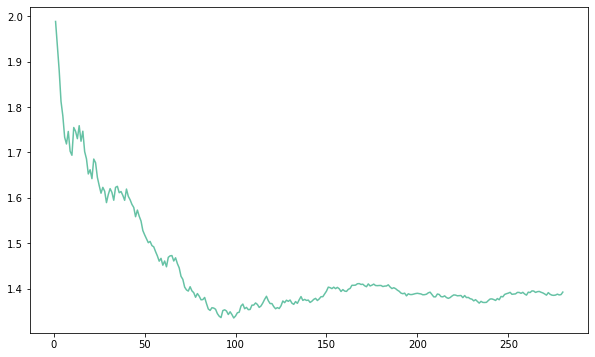

In [17]:
scores=[] ;  num_B=[]
for i,B in enumerate(range(20,300)):
    regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),oob_score=True, n_estimators=B, random_state=1706).fit(X_train, y_train)
    # Predict test set labels
    scores.append(mean_squared_error(y_train, regr.predict(X_train))) ; num_B.append(i+1)
fig, ax = plt.subplots(1,1,figsize=(10,6))  

sns.lineplot(x=num_B, y=scores)
plt.show()     

### Variable Importance Measures
- Bagging improves prediction accuracy at the expense of interpretability since it is the average of many trees
- One can obtain an overall summary of the importance of each predictor using:
    - the RSS (for bagging regression trees)
    - the Gini index (for bagging classification trees)

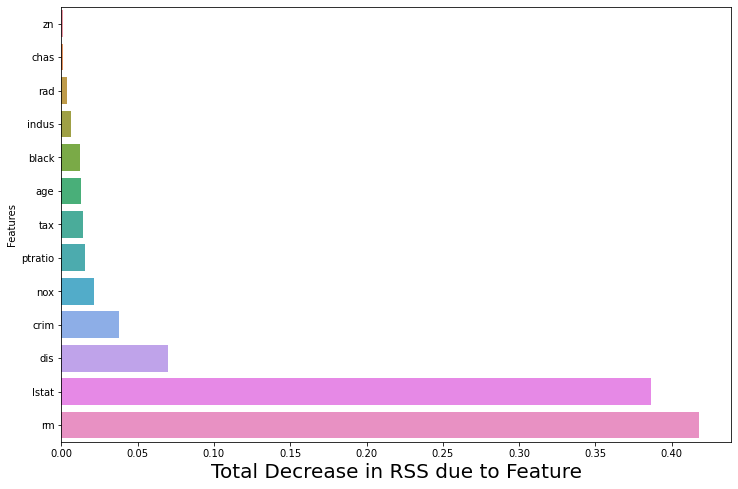

In [18]:
feature_importances = np.mean([tree.feature_importances_ for tree in regr.estimators_], axis=0)

Importance = pd.DataFrame({'Importance':feature_importances, 'Features':X_train.columns})
Importance.sort_values('Importance', axis=0, ascending=True,inplace=True)

fig, ax=plt.subplots(1,1,figsize=(12,8))
sns.barplot(y='Features', x='Importance',data=Importance, orient='h', ax=ax)
ax.set_xlabel("Total Decrease in RSS due to Feature", fontsize=20)
plt.show()

## Random Forests
- __Random forests__ provide an improvement over bagged trees by way of a small tweak that decorrelates the trees
- Each time a split in a tree is considered, a random sample of m predictors is chosen as split candidates from the full set of p predictors.
- The split is allowed to use only one of those m predictors. 
- A fresh sample of m predictors is taken at each split, and typically we choose $m\approx \sqrt{p}$

### Random forests, why it's working
- In other words, the algorithm is not allowed to consider a majority of the available predictors. 

Why?
- Suppose that there is one very strong predictor in the data set, along with a number of other moderately strong predictors. 
- Then in the collection of bagged trees, most or all of the trees will use this strong predictor in the top split.
- Consequently, all of the bagged trees will look quite similar to each other.
    - Hence the predictions from the bagged trees will be __highly correlated__
- Averaging many highly correlated quantities does not lead to as large of a reduction in variance as averaging many uncorrelated quantities

### Random forests, why it's working continued
- Because each split is forced to consider only a subset of the predictors, many splits will not consider the strong predictor
- This decorrelates the trees: on average trees are less variable and hence more reliable
- Note that bagging is a special case of random forests where $m=p$

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
print(X_train2.shape)
m = round(np.sqrt(X_train2.shape[1]))
print(m)

# Random forests: using m features
clf2 = RandomForestClassifier(max_features=m, random_state=1706)
clf2.fit(X_train2, y_train2)
mean_squared_error(y_train2, clf2.predict(X_train2))

(299, 13)
4


0.0

## Boosting
- __Boosting__, is another approach for improving the predictions resulting from a decision tree. 
    - Like bagging, boosting is a general approach that can be applied to many statistical learning methods
- Recall that bagging involves creating multiple copies of the original training data set using the bootstrap
    - fitting a separate decision tree to each copy
    - then combining all of the trees in order to create a single predictive model. 
    - Each tree is built on a bootstrap data set, independent of the other trees 
- Boosting works in a similar way, except that the trees are grown sequentially: 
    - each tree is grown using information from previously grown trees. 
    - there is no bootstrap sampling; 
    - instead each tree is fit on a modified version of the original data set

## Boosting Algorithm
1. Set $\hat{f}(x) = 0$ and $r_i=y_i$ for all $i$ in the training set 
2. For $b = 1, 2, \dots,B$, repeat:
    - a) Fit a tree $\hat{f}^b$ with d splits (d+1 terminal nodes) to the training data $(X, r)$.
    - b) Update $\hat{f}$ by adding in a shrunken version of the new tree:
    $$\hat{f}(x) \leftarrow \hat{f}(x) + \lambda \hat{f}^b(x)$$
    - c) Update the residual:
    $$r_i=r_i-\lambda \hat{f}^b(x)$$
3. Output the boosted model:
$$\hat{f}(x) = \sum_{b=1}^B \lambda\hat{f}^b(x)$$

## Boosting explained
- Unlike fitting a single large decision tree to the data, which amounts to _fitting the data hard_ and potentially __overfitting__, the boosting approach instead _learns slowly_.
- we fit a tree using the current residuals, rather than the outcome Y , as the response.
-  We then add this new decision tree into the fitted function in order to update the residuals. 
- Each of these trees can be rather small, with just a few terminal nodes, determined by the parameter d in the algorithm.

## Hyperparameters
- We started from a single parameter and ended with boosting method
- Note that this method is also usually combined with cross validation techniques
- As you can tell, our discussion is increasingly moving away from discussing individual predictors
- Instead, we are now interested in:
    - How many trees should we use (B)
    - How many splits our tree should have  (d)
    - How fast should the model learn $\lambda$
    - How many folds should our CV use (k)
- These learning parameters are known as __hyperparameters__ and are usually the core focus of machine learning methods

# Case Study

In [21]:
# load Boston data
boston_df = pd.read_csv(''.join([folder,'Boston.csv']))
display(boston_df.info())
boston_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


None

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
# Separate predictors and target
X = boston_df.drop('medv', axis=1)
y = boston_df.medv
# Split between train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

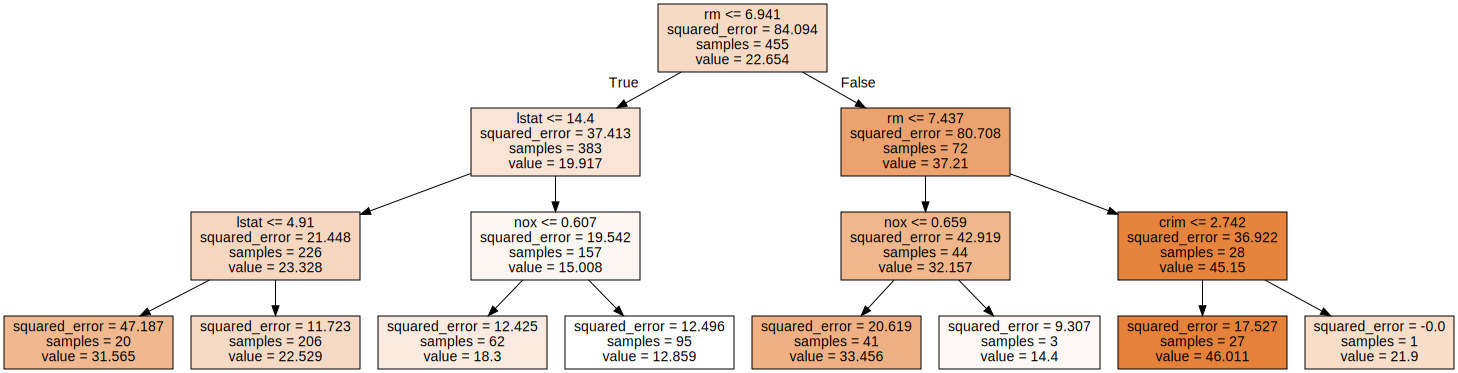

In [23]:
# Regression Tree
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train, y_train)
pred = regr.predict(X_test)

graph = Source(tree.export_graphviz(reg, out_file=None, feature_names=X.columns , filled = True))
display(SVG(graph.pipe(format='svg')))

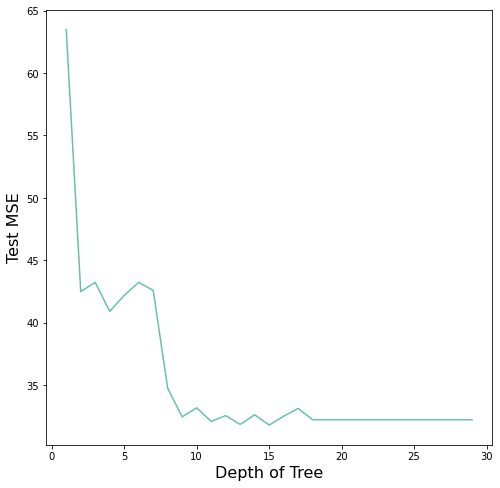

In [24]:
## Regression Tree and Depth of the Tree
MSEs=[] ; Depth=[]
for d in np.arange(1,30):
    reg = DecisionTreeRegressor(max_depth=d, random_state=1706)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    MSEs.append(mean_squared_error(y_test, pred)) ;  Depth.append(d)
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.lineplot(x=Depth, y=MSEs,ax=ax)
ax.set_xlabel("Depth of Tree",fontsize=16)
ax.set_ylabel("Test MSE",fontsize=16)

plt.show()

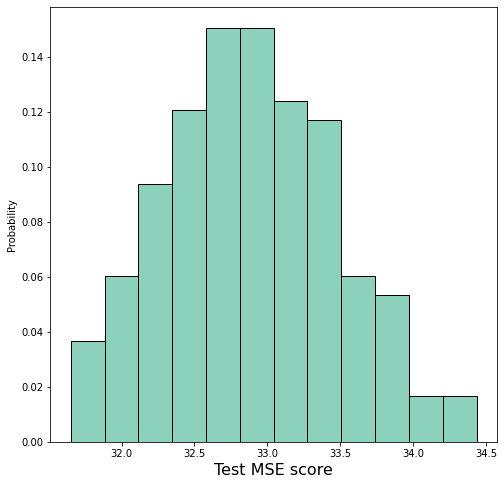

In [25]:
## Regression Tree and Random State
MSEs=[] ; States=[]
for state in np.arange(1,300):
    reg = DecisionTreeRegressor(max_depth=10, random_state=state)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    MSEs.append(mean_squared_error(y_test, pred)) ;  States.append(state)
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.histplot(x=MSEs,stat='probability',ax=ax)
ax.set_xlabel('Test MSE score',fontsize=16)
plt.show()

In [26]:
# Bagging
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
oob_bag=[] ; r2_bag=[] # create list to record predictive performance
num_trees=[]
m=X_train.shape[1] # set m to the number of features in the data
for i,B in enumerate(range(20,300)):
    reg_bag = RandomForestRegressor(n_estimators=B, max_features=m, oob_score=True,random_state=1706).fit(X_train, y_train) # recall that bagging is a special case of random forest in which max features is the number of predictors
    oob_bag.append(reg_bag.oob_score_) ; r2_bag.append(r2_score(y_test, reg_bag.predict(X_test))) ; num_trees.append(i)
res=pd.DataFrame({'OOB Score':oob_bag, r"Test $R^2$":r2_bag, "Trees": num_trees})

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feat

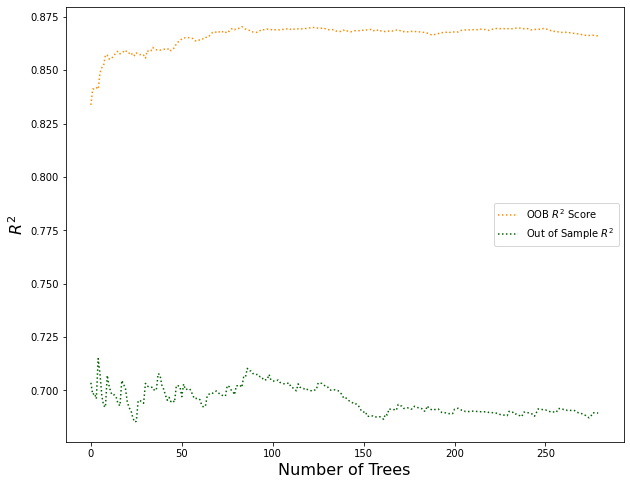

In [27]:
fig, ax= plt.subplots(1,1, figsize=(10,8))
sns.lineplot(x='Trees', y='OOB Score', color='darkorange',linestyle=":",label=r'OOB $R^2$ Score', data=res, ax=ax)
sns.lineplot(x='Trees', y='Test $R^2$', color='darkgreen',linestyle=":",label=r"Out of Sample $R^2$", data=res,ax=ax)
ax.set_ylabel(r"$R^2$", fontsize=16)
ax.set_xlabel("Number of Trees", fontsize=16)

plt.show()

In [28]:
# Boosting
from sklearn.ensemble import GradientBoostingRegressor
B=100
learning_rates=np.linspace(0.001,1,30)
depths=np.arange(1,31)
MSEs=[] ; lambdas=[] ; depth_values=[]
for 𝜆 in learning_rates:
    for d in depths:   
        boo = GradientBoostingRegressor(n_estimators=B,max_depth=d, learning_rate=𝜆, random_state=1706).fit(X_train, y_train)
        MSEs.append(mean_squared_error(y_test,boo.predict(X_test))) ; lambdas.append(𝜆) ; depth_values.append(d)

In [29]:
res=pd.DataFrame({'MSE':MSEs, '𝜆':lambdas, 'Depth':depth_values})
print(f" Best learning rate: {float(res.loc[res.MSE==res.MSE.min(),'𝜆'])}")
print(f" Best Depth: {int(res.loc[res.MSE==res.MSE.min(),'Depth'])}")

res.head()

 Best learning rate: 0.8966551724137931
 Best Depth: 3


,MSE,𝜆,Depth
0,83.026136,0.001,1
1,79.373346,0.001,2
2,78.709319,0.001,3
3,78.503065,0.001,4
4,78.190581,0.001,5


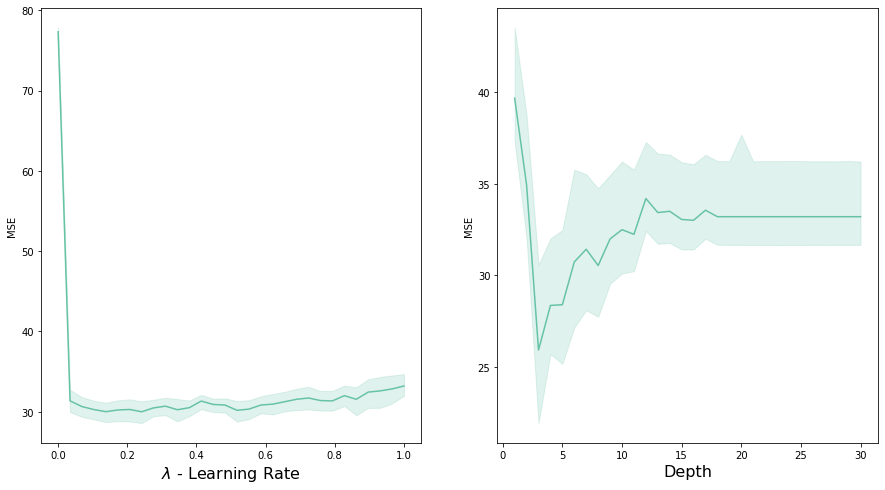

In [30]:
fig, axes = plt.subplots(1,2,figsize=(15,8))
sns.lineplot(x=r'𝜆', y='MSE', data=res, ax=axes[0])
sns.lineplot(x='Depth', y='MSE', data=res, ax=axes[1])

axes[0].set_xlabel(r"$\lambda$ - Learning Rate", fontsize=16)
axes[1].set_xlabel("Depth", fontsize=16)

plt.show()

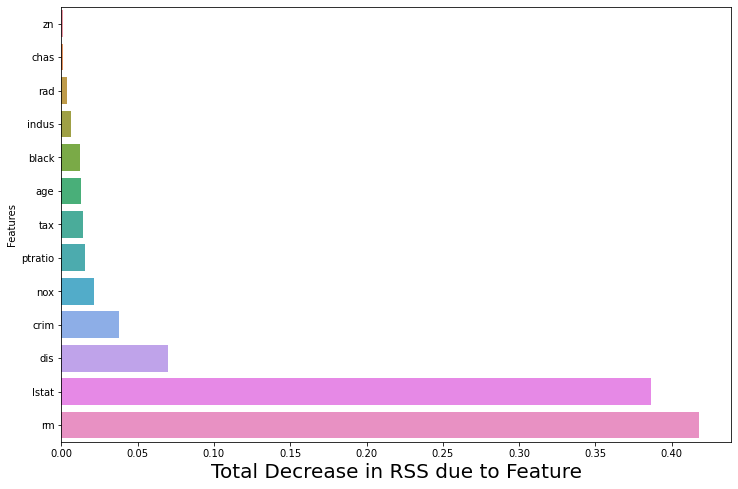

In [31]:
best_learning_rate=float(res.loc[res.MSE==res.MSE.min(),'𝜆'])
best_depth=int(res.loc[res.MSE==res.MSE.min(),'Depth'])
regr = GradientBoostingRegressor(n_estimators=B, learning_rate=best_learning_rate,max_depth=best_depth, random_state=1706).fit(X_train, y_train)

feature_importance = regr.feature_importances_*100
Importance = pd.DataFrame({'Importance':feature_importances, 'Features':X_train.columns})
Importance.sort_values('Importance', axis=0, ascending=True,inplace=True)

fig, ax=plt.subplots(1,1,figsize=(12,8))
sns.barplot(y='Features', x='Importance',data=Importance, orient='h', ax=ax)
ax.set_xlabel("Total Decrease in RSS due to Feature", fontsize=20)
plt.show()